In [231]:
import numpy as np
import matplotlib.pyplot as plt
import math

### variables

In [232]:
delta = 0.01
n = 10000
prob = np.arange(0, delta+1, delta)

In [233]:
np.random.seed(seed=42)

### Helper functions

In [234]:
def closest_point_binary_search(points, target):
    left, right = 0, len(points) - 1

    while left <= right:
        mid = (left + right) // 2
        print(left, right, mid)
        if points[mid] == target:
            return points[mid]

        if points[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    # At this point, left and right have crossed, and 'left' points to the closest point.
    # You can choose either 'left' or 'right' based on your preference.

    if left == 0:
        return points[left]
    elif right == len(points) - 1:
        return points[right]
    else:
        # Check which of the two closest points is actually closer
        return min(points[left], points[right], key=lambda x: abs(x - target))



### functions

In [235]:
def hoeffding():
    epsilon = math.sqrt(math.log(1/delta)/(2*n))
    print("Epsilon: ", epsilon)
    values = []
    for i in prob:
        i = i + epsilon
        values.append(i)
    return values

def kl_inequality(data):
    epsilon = math.log((n+1)/delta)/n
    kl_inv = closest_point_binary_search(data, epsilon)
    print(kl_inv)
    values = []
    for i in data:
        if i < kl_inv:
            i = epsilon
        else:
            i = i + epsilon
        values.append(i)
    print(epsilon)
    return values

kl_inequality(prob)

0 100 50
0 49 24
0 23 11
0 10 5
0 4 2
0 1 0
1 1 1
0.0
0.0013815610552964607


[0.0013815610552964607,
 0.01138156105529646,
 0.021381561055296462,
 0.03138156105529646,
 0.04138156105529646,
 0.05138156105529646,
 0.061381561055296456,
 0.07138156105529647,
 0.08138156105529647,
 0.09138156105529646,
 0.10138156105529647,
 0.11138156105529647,
 0.12138156105529646,
 0.13138156105529647,
 0.14138156105529648,
 0.15138156105529646,
 0.16138156105529647,
 0.17138156105529648,
 0.18138156105529646,
 0.19138156105529647,
 0.20138156105529648,
 0.21138156105529646,
 0.22138156105529647,
 0.23138156105529648,
 0.24138156105529646,
 0.25138156105529647,
 0.2613815610552965,
 0.2713815610552965,
 0.2813815610552965,
 0.29138156105529645,
 0.30138156105529645,
 0.31138156105529646,
 0.32138156105529647,
 0.3313815610552965,
 0.3413815610552965,
 0.3513815610552965,
 0.36138156105529645,
 0.37138156105529646,
 0.38138156105529647,
 0.3913815610552965,
 0.4013815610552965,
 0.4113815610552965,
 0.42138156105529645,
 0.43138156105529646,
 0.44138156105529647,
 0.451381561055

### plots

Epsilon:  0.015174271293851465
[0.015174271293851465, 0.025174271293851466, 0.035174271293851464, 0.045174271293851466, 0.05517427129385147, 0.06517427129385146, 0.07517427129385146, 0.08517427129385147, 0.09517427129385146, 0.10517427129385146, 0.11517427129385147, 0.12517427129385147, 0.13517427129385146, 0.14517427129385146, 0.15517427129385147, 0.16517427129385145, 0.17517427129385146, 0.18517427129385147, 0.19517427129385145, 0.20517427129385146, 0.21517427129385147, 0.22517427129385145, 0.23517427129385146, 0.24517427129385147, 0.25517427129385145, 0.26517427129385146, 0.27517427129385147, 0.2851742712938515, 0.2951742712938515, 0.30517427129385144, 0.31517427129385145, 0.32517427129385146, 0.33517427129385147, 0.3451742712938515, 0.3551742712938515, 0.3651742712938515, 0.37517427129385145, 0.38517427129385146, 0.39517427129385146, 0.4051742712938515, 0.4151742712938515, 0.4251742712938515, 0.43517427129385144, 0.44517427129385145, 0.45517427129385146, 0.46517427129385147, 0.4751

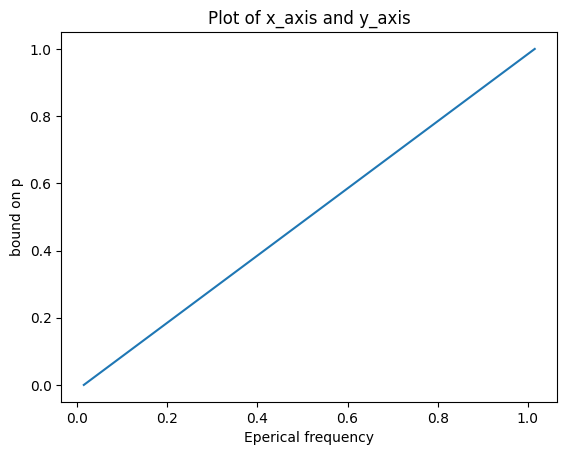

In [236]:
x_axis = hoeffding()
y_axis = prob
print(x_axis, len(x_axis))
print(y_axis, len(y_axis))

plt.plot(x_axis, y_axis)
plt.xlabel('Eperical frequency')
plt.ylabel('bound on p')
plt.title('Plot of x_axis and y_axis')
plt.show()


0 100 50
0 49 24
0 23 11
0 10 5
0 4 2
0 1 0
1 1 1
0.0
0.0013815610552964607
[0.0013815610552964607, 0.01308156105529646, 0.020681561055296463, 0.02968156105529646, 0.03968156105529646, 0.05058156105529646, 0.05768156105529646, 0.06608156105529646, 0.08508156105529646, 0.08648156105529646, 0.09878156105529647, 0.11268156105529646, 0.11678156105529647, 0.13478156105529646, 0.14678156105529647, 0.15058156105529646, 0.16398156105529646, 0.16778156105529646, 0.18498156105529648, 0.19118156105529646, 0.19778156105529646, 0.21758156105529647, 0.22218156105529646, 0.23238156105529648, 0.24158156105529646, 0.24798156105529648, 0.26598156105529647, 0.2784815610552965, 0.2799815610552965, 0.2880815610552965, 0.3050815610552965, 0.30348156105529644, 0.32168156105529644, 0.33358156105529646, 0.3369815610552965, 0.3500815610552965, 0.3616815610552965, 0.37258156105529644, 0.38108156105529645, 0.38748156105529646, 0.4054815610552965, 0.41188156105529644, 0.4190815610552965, 0.4275815610552965, 0.4432

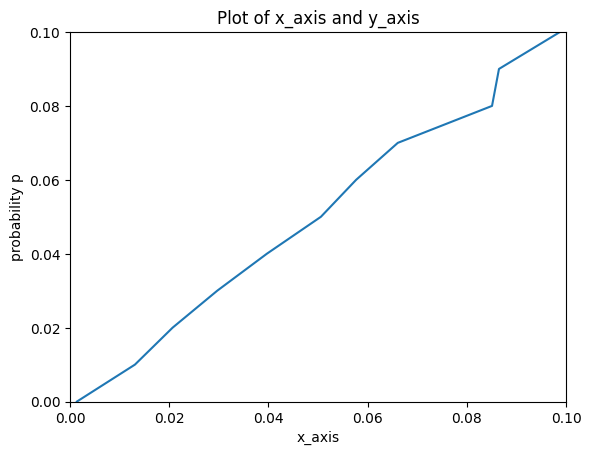

In [237]:
x_axis = kl_inequality(max_list)
y_axis = prob
print(x_axis, len(x_axis))
print(y_axis, len(y_axis))

plt.plot(x_axis, y_axis)
plt.xlim(0, 0.1)
plt.ylim(0, 0.1)
plt.xlabel('x_axis')
plt.ylabel('probability p')
plt.title('Plot of x_axis and y_axis')
plt.show()

In [238]:


# Example usage:
points = max_list
target_value = math.log((n+1)/delta)/n

closest = closest_point_binary_search(points, target_value)
print(f"The closest point to {target_value} is {closest}")


0 100 50
0 49 24
0 23 11
0 10 5
0 4 2
0 1 0
1 1 1
The closest point to 0.0013815610552964607 is 0.0
